### KHAI BÁO THƯ VIỆN

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score
from linearTuCode import *
import matplotlib.pyplot as plt

### ĐỌC FILE DỮ LIỆU

In [4]:
data = pd.read_csv('Gold_Price.csv')

### CHIA THÀNH CÁC TẬP TRAIN VÀ TEST

In [5]:
dt_train,dt_test = train_test_split(data,test_size=0.3,shuffle=True)

X_train = dt_train.drop(['Date','Price'], axis = 1) 
y_train = dt_train['Price'] 
X_test= dt_test.drop(['Date','Price'], axis = 1)
y_test= dt_test['Price']

### LINEAR REGRESSION TỰ CODE

In [21]:
linearTuCode = LinearRegressionTuCode()
linearTuCode.fit(X_train,y_train)
y_pred = linearTuCode.predict(X_test)

# in ra kết quả đánh giá mô hình
def NSE(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

r2_score_linearTuCode = r2_score(y_test, y_pred)
nse_linearTuCode = NSE(y_test, y_pred)
mae_linearTuCode = mean_absolute_error(y_test, y_pred)
rmse_linearTuCode = np.sqrt(mean_squared_error(y_test, y_pred))


print('R2 scoree: ', r2_score(y_test, y_pred))
print('NSE scoree: ', NSE(y_test, y_pred))
print('MAE scoree: ', mean_absolute_error(y_test, y_pred))
print('RMSEE: ', np.sqrt(mean_squared_error(y_test, y_pred)))



R2 scoree:  0.9998542407144524
NSE scoree:  0.9998542407144524
MAE scoree:  68.58233346181044
RMSEE:  108.29340883941975


### LINEAR REGRESSION

In [22]:
reg = LinearRegression(fit_intercept=False).fit(X_train,y_train)
#de ko di qua goc toa do de + hang so b
y_predict = reg.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))

# in ra kết quả đánh giá mô hình
def NSE(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

r2_score_linear = r2_score(y_test,y_predict)
NSE_linear = NSE(y_test,y_predict)
MAE_linear = mean_absolute_error(y_test,y_predict)
RMSE_linear = np.sqrt(mean_squared_error(y_test,y_predict))

print("\nR2 LinearRegression :",r2_score(y_test,y_predict))
print("NSE LinearRegression :",NSE(y_test,y_predict))
print("MAE LinearRegression :",mean_absolute_error(y_test,y_predict))
print("RMSE LinearRegression :",np.sqrt(mean_squared_error(y_test,y_predict)))


Thuc te		Du doan		Chenh lech
  29789 	 29759.950622415803 	 29.049377584196918
  48836 	 48785.87643367256 	 50.12356632744195
  26821 	 26857.927335297478 	 36.92733529747784
  49208 	 49219.50162663331 	 11.501626633311389
  44647 	 44681.587465672994 	 34.58746567299386
  47138 	 47045.546876718705 	 92.45312328129512
  29085 	 29070.442663528782 	 14.55733647121815
  51166 	 51207.698287490595 	 41.69828749059525
  50956 	 50978.49421264173 	 22.494212641729973
  46128 	 45969.94087625961 	 158.05912374039326
  27667 	 27733.90539900219 	 66.90539900218937
  28852 	 28840.708089371696 	 11.291910628304322
  50652 	 50677.39423995721 	 25.39423995721154
  44233 	 44421.24474394689 	 188.24474394688878
  31186 	 31204.954697856392 	 18.95469785639216
  51032 	 50908.486076602465 	 123.51392339753511
  52724 	 53388.356877459875 	 664.3568774598752
  30469 	 30466.305835144092 	 2.6941648559077294
  46989 	 47059.50927485197 	 70.50927485196735
  37688 	 37673.74473720876 	 14.2552627

### LASSO

In [9]:
lasso = Lasso(alpha=0.2,max_iter=1000,tol=0.01).fit(X_train,y_train)
#
y_predict = lasso.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))

# in ra kết quả đánh giá mô hình
def NSE(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

r2_score_lasso = r2_score(y_test,y_predict)
NSE_lasso = NSE(y_test,y_predict)
MAE_lasso = mean_absolute_error(y_test,y_predict)
RMSE_lasso = np.sqrt(mean_squared_error(y_test,y_predict))


print("\nR2 LinearRegression :",r2_score(y_test,y_predict))
print("NSE LinearRegression :",NSE(y_test,y_predict))
print("MAE LinearRegression :",mean_absolute_error(y_test,y_predict))
print("RMSE LinearRegression :",np.sqrt(mean_squared_error(y_test,y_predict)))

Thuc te		Du doan		Chenh lech
  29789 	 29808.111751642246 	 19.11175164224551
  48836 	 48722.22425148581 	 113.77574851419195
  26821 	 26843.017047692167 	 22.01704769216667
  49208 	 49178.234002492725 	 29.765997507274733
  44647 	 45097.62298324499 	 450.6229832449899
  47138 	 47041.74100443134 	 96.25899556866352
  29085 	 29076.061622860987 	 8.938377139013028
  51166 	 51155.63792895012 	 10.362071049879887
  50956 	 50799.29401660494 	 156.7059833950625
  46128 	 45876.84806075804 	 251.15193924195773
  27667 	 27694.51073289089 	 27.510732890888903
  28852 	 28881.20311440049 	 29.20311440049045
  50652 	 50589.484294274276 	 62.51570572572382
  44233 	 44572.22401575196 	 339.2240157519627
  31186 	 31127.684151157362 	 58.315848842637934
  51032 	 50915.06378661562 	 116.93621338438243
  52724 	 53872.27141440627 	 1148.2714144062702
  30469 	 30486.65127249022 	 17.651272490220435
  46989 	 47161.55492664641 	 172.5549266464077
  37688 	 37613.07778759968 	 74.92221240032

### NEURAL NETWORK

In [18]:
# MLP

mlp = MLPRegressor(hidden_layer_sizes=(100,100,100),activation='relu',solver='adam',max_iter=1000).fit(X_train,y_train)

y_predict = mlp.predict(X_test)
y_test = np.array(y_test)

print("Thuc te\t\tDu doan\t\tChenh lech")
for i in range(0,len(y_test)):
    print(" ",y_test[i],"\t",y_predict[i],"\t", abs(y_test[i]-y_predict[i]))

# in ra kết quả đánh giá mô hình
def NSE(y_test, y_pred):
    return 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))

r2_score_mlp = r2_score(y_test,y_predict)
NSE_mlp = NSE(y_test,y_predict)
MAE_mlp = mean_absolute_error(y_test,y_predict)
RMSE_mlp = np.sqrt(mean_squared_error(y_test,y_predict))

print("\nR2 LinearRegression :",r2_score(y_test,y_predict))
print("NSE LinearRegression :",NSE(y_test,y_predict))
print("MAE LinearRegression :",mean_absolute_error(y_test,y_predict))
print("RMSE LinearRegression :",np.sqrt(mean_squared_error(y_test,y_predict)))


Thuc te		Du doan		Chenh lech
  29789 	 29645.613776847826 	 143.38622315217435
  48836 	 48770.618838284114 	 65.38116171588626
  26821 	 26928.56957217833 	 107.56957217833042
  49208 	 49165.84307558427 	 42.15692441572901
  44647 	 44940.809859913694 	 293.8098599136938
  47138 	 47006.987200638665 	 131.01279936133506
  29085 	 29076.972434397972 	 8.027565602027607
  51166 	 51165.89386896062 	 0.10613103937794222
  50956 	 50957.63927069585 	 1.6392706958504277
  46128 	 45891.527408754984 	 236.4725912450158
  27667 	 27719.85360748322 	 52.85360748321909
  28852 	 28823.391153982255 	 28.608846017745236
  50652 	 50622.16841541601 	 29.831584583989752
  44233 	 44446.748223095994 	 213.74822309599404
  31186 	 31320.485779533523 	 134.48577953352287
  51032 	 50870.54679889454 	 161.45320110546163
  52724 	 53556.15339438222 	 832.1533943822214
  30469 	 30367.147226917245 	 101.85277308275545
  46989 	 47138.193511709986 	 149.19351170998561
  37688 	 37580.309781600656 	 107.

### STACKING 

In [17]:
from collections import Counter
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
import numpy as np

class StackingRegressorCustom:
    def __init__(self, model1=LinearRegression(fit_intercept=False), model2=Lasso(alpha=1.0, max_iter=1000, tol=0.01),
                 model3=MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', max_iter=1000),
                 final_estimator=LinearRegression(), cv=5, passthrough=True, n_jobs=-1):
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3
        self.final_estimator = final_estimator
        self.cv = cv
        self.passthrough = passthrough
        self.n_jobs = n_jobs
        self.stacked_model = StackingRegressor(
            estimators=[('model1', model1), ('model2', model2), ('model3', model3)],
            final_estimator=final_estimator,
            cv=cv,
            passthrough=passthrough,
            n_jobs=n_jobs
        )

    def fit(self, X_train, y_train):
        self.model1.fit(X_train, y_train)
        self.model2.fit(X_train, y_train)
        self.model3.fit(X_train, y_train)
        self.stacked_model.fit(X_train, y_train)

    def vote(self, X_test):
        y_pred1 = self.model1.predict(X_test)
        y_pred2 = self.model2.predict(X_test)
        y_pred3 = self.model3.predict(X_test)
        y_pred_stacked = self.stacked_model.predict(X_test)
        # use counter to find the most common value
        y_pred = []
        for i in range(len(y_pred1)):
            y_pred.append(Counter([y_pred1[i], y_pred2[i], y_pred3[i], y_pred_stacked[i]]).most_common(1)[0][0])
        return y_pred

    def predict(self, X_test):
        y_pred1 = self.model1.predict(X_test)
        y_pred2 = self.model2.predict(X_test)
        y_pred3 = self.model3.predict(X_test)
        y_pred_stacked = self.vote(X_test)
        return y_pred_stacked
    
    

# Sử dụng class StackingRegressorCustom
stacked_classifier = StackingRegressorCustom()
stacked_classifier.fit(X_train, y_train)
y_predict_stacked = stacked_classifier.predict(X_test)

r2_score_stacked = r2_score(y_test,y_predict_stacked)
NSE_stacked = NSE(y_test,y_predict_stacked)
MAE_stacked = mean_absolute_error(y_test,y_predict_stacked)
RMSE_stacked = np.sqrt(mean_squared_error(y_test,y_predict_stacked))

print("r2_score of StackingRegressorCustom :",r2_score(y_test,y_predict_stacked))
print("NSE of StackingRegressorCustom :",NSE(y_test,y_predict_stacked))
print("MAE of StackingRegressorCustom :",mean_absolute_error(y_test,y_predict_stacked))
print("RMSE of StackingRegressorCustom :",np.sqrt(mean_squared_error(y_test,y_predict_stacked)))


r2_score of StackingRegressorCustom : 0.9998544503502802
NSE of StackingRegressorCustom : 0.9998544503502802
MAE of StackingRegressorCustom : 68.38970252330981
RMSE of StackingRegressorCustom : 108.21550523636948


### VẼ BIỂU ĐỒ SO SÁNH CÁC ĐỘ ĐO

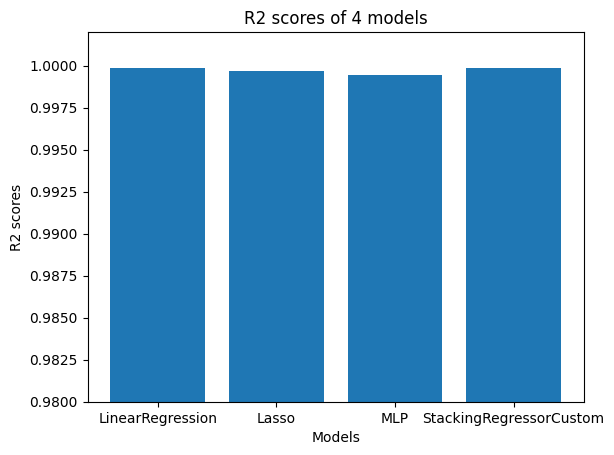

In [13]:
# vẽ biểu đồ cột so sánh độ đo r2 của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
r2_scores = [r2_score_linear,r2_score_lasso,r2_score_mlp,r2_score_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,r2_scores)
plt.title('R2 scores of 4 models')
plt.xlabel('Models')
plt.ylabel('R2 scores')
plt.ylim(0.98, 1.002)  # Set the y-axis limits
plt.show()

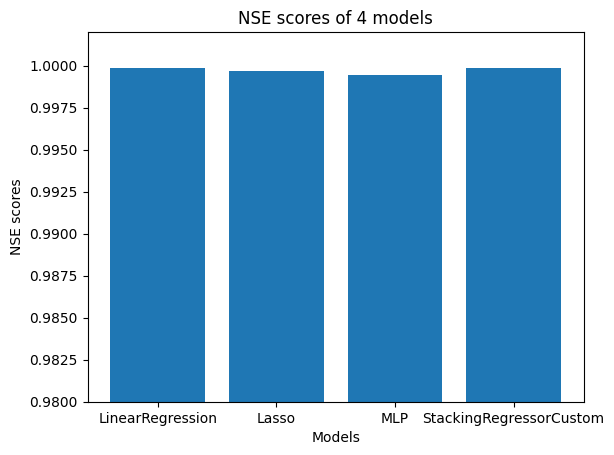

In [14]:
# vẽ biểu đồ cột so sánh độ đo NSE của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
NSE_scores = [NSE_linear,NSE_lasso,NSE_mlp,NSE_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,NSE_scores)
plt.title('NSE scores of 4 models')
plt.xlabel('Models')
plt.ylabel('NSE scores')
plt.ylim(0.98, 1.002)  # Set the y-axis limits
plt.show()

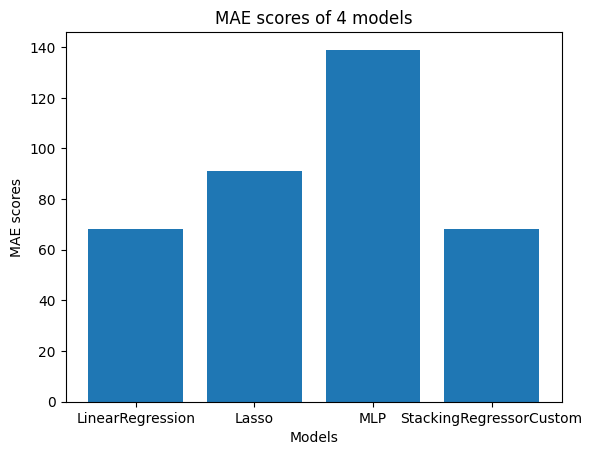

In [15]:
# vẽ biểu đồ cột so sánh độ đo MAE của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
MAE_scores = [MAE_linear,MAE_lasso,MAE_mlp,MAE_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,MAE_scores)
plt.title('MAE scores of 4 models')
plt.xlabel('Models')
plt.ylabel('MAE scores')
plt.show()


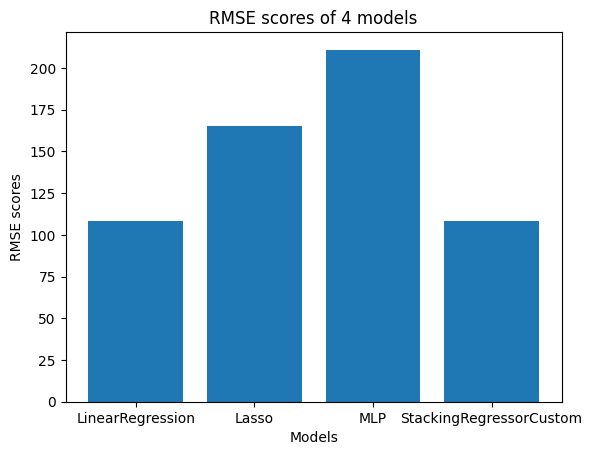

In [16]:
# vẽ biểu đồ cột so sánh độ đo RMSE của 4 mô hình: LinearRegression, Lasso, MLP, StackingRegressorCustom
RMSE_scores = [RMSE_linear,RMSE_lasso,RMSE_mlp,RMSE_stacked]
labels = ['LinearRegression','Lasso','MLP','StackingRegressorCustom']
plt.bar(labels,RMSE_scores)
plt.title('RMSE scores of 4 models')
plt.xlabel('Models')
plt.ylabel('RMSE scores')
plt.show()
